In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import time
from datetime import datetime,timedelta


plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

## Load data

In [2]:
data=pd.read_csv('E:/大创/机器学习/lizhiyuce6.csv')

In [3]:
del data['Unnamed: 0']
del data['离职时间与当前时间差值']
del data['人员类型']
data.head()

,工号,数据日期,消息发送,在线文档被查阅总数,在线文档被编辑总数,在线文档被评论总数,在线文档被收藏总数,周报被评论总数,在线文档查阅总数,在线文档编辑总数,...,会议沟通人数,工龄(年),标准职级描述,当前在岗时长(月),当周考勤打卡次数,当周外勤打卡次数,是否离职,员工类型_Ordinal,性别_Ordinal,最高学历学历_Ordinal
0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,2021-01-03,114.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,10.0000,3.100,10.0,0.0,0.0,2,4,1,6.0
1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2021-04-25,214.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,15.5000,4.100,7.0,0.0,0.0,0,5,1,6.0
2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2021-06-27,71.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,3.0,18.2500,4.600,9.0,6.0,0.0,0,5,1,6.0
3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2021-08-29,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.6250,4.850,10.0,0.0,0.0,3,5,1,6.0
4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,2022-02-20,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,16.3125,2.975,1.0,0.0,0.0,0,4,1,6.0


In [4]:
data=data[(data['是否离职']==1)|(data['是否离职']==0)]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936078 entries, 1 to 4494175
Data columns (total 27 columns):
 #   Column          Dtype  
---  ------          -----  
 0   工号              object 
 1   数据日期            object 
 2   消息发送            float64
 3   在线文档被查阅总数       float64
 4   在线文档被编辑总数       float64
 5   在线文档被评论总数       float64
 6   在线文档被收藏总数       float64
 7   周报被评论总数         float64
 8   在线文档查阅总数        float64
 9   在线文档编辑总数        float64
 10  在线文档评论总数        float64
 11  在线文档收藏总数        float64
 12  周报阅读总数          float64
 13  周报点赞总数          float64
 14  周报评论总数          float64
 15  请假总天数           float64
 16  日程沟通人数          float64
 17  会议沟通人数          float64
 18  工龄(年)           float64
 19  标准职级描述          float64
 20  当前在岗时长(月)       float64
 21  当周考勤打卡次数        float64
 22  当周外勤打卡次数        float64
 23  是否离职            int64  
 24  员工类型_Ordinal    int64  
 25  性别_Ordinal      int64  
 26  最高学历学历_Ordinal  float64
dtypes: float64(22), int64(3), object(2)
memor

In [6]:
data.shape

(1936078, 27)

In [7]:
id_col='工号'
target_col='是否离职'
digital_cols=['消息发送', '在线文档被查阅总数', '在线文档被编辑总数', '在线文档被评论总数',
       '在线文档被收藏总数', '周报被评论总数', '在线文档查阅总数', '在线文档编辑总数', '在线文档评论总数', '在线文档收藏总数',
       '周报阅读总数', '周报点赞总数', '周报评论总数', '请假总天数', '日程沟通人数', '会议沟通人数', '工龄(年)', '标准职级描述', 
              '当前在岗时长(月)', '当周考勤打卡次数', '当周外勤打卡次数']
category_cols=[ '员工类型_Ordinal','性别_Ordinal', '最高学历学历_Ordinal']

In [8]:
del data['数据日期']

In [25]:
del data['工号']

## 

In [26]:
groupby_data_o=data.groupby(['是否离职'])['是否离职'].count()   #标签类别分类计数
groupby_data_o

是否离职
0    1719037
1     217041
Name: 是否离职, dtype: int64

In [27]:
y=data['是否离职']
x=data.drop(['是否离职'],axis=1)

In [28]:
#使用RandomUnderSampler进行欠抽样处理
from imblearn.under_sampling import RandomUnderSampler #欠抽样处理库RandomUnderSampler
 
model_RandomUnderSampler=RandomUnderSampler()   #实例化
x_RandomUnderSampler_resampled,y_RandomUnderSampler_resampled=model_RandomUnderSampler.fit_resample(x,y)  #输入数据进行欠抽样处理
y_RandomUnderSampler_resampled=pd.DataFrame(y_RandomUnderSampler_resampled,columns=['是否离职'])
 
RandomUnderSampler_resampled=pd.concat([x_RandomUnderSampler_resampled,y_RandomUnderSampler_resampled],axis=1)  #将特征和标签重新拼接
group_data_RandomUnderSampler=RandomUnderSampler_resampled.groupby(['是否离职'])['是否离职'].count()   #查看标签类别个数
group_data_RandomUnderSampler

是否离职
0    217041
1    217041
Name: 是否离职, dtype: int64

In [29]:
#RandomUnderSampler_resampled.head()

## 

In [30]:
from sklearn.model_selection import train_test_split
#data:需要进行分割的数据集
#random_state:设置随机种子，保证每次运行生成相同的随机数
#test_size:将数据分割成训练集的比例
train_set, test_set = train_test_split(RandomUnderSampler_resampled, test_size=0.2, random_state=42)

X_train=train_set.drop(['是否离职'],axis=1,inplace=False)
y_train=train_set['是否离职']
X_test=test_set.drop(['是否离职'],axis=1,inplace=False)
y_test=test_set['是否离职']

In [31]:
# from sklearn.preprocessing import MinMaxScaler

# sacalar = MinMaxScaler()
# train_digital = sacalar.fit_transform(train_set[digital_cols])
# test_digital = sacalar.transform(test_set[digital_cols])

In [32]:
# train_features = np.hstack((train_digital, train_set[category_cols]))
# test_features = np.hstack((test_digital, test_set[category_cols]))
# train_features.shape, test_features.shape

In [33]:
# train_labels=train_set[target_col]
# train_labels.shape

In [34]:
#X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)

## 

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    # 对测试集进行预测
    y_pred = model.predict(X_test)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    print("准确率：", accuracy)
    
    # 计算精确率
    precision = precision_score(y_test, y_pred)
    print("精确率：", precision)
    
    # 计算召回率
    recall = recall_score(y_test, y_pred)
    print("召回率：", recall)
    
    # 计算F1分数
    f1 = f1_score(y_test, y_pred)
    print("F1分数：", f1)


In [45]:
from sklearn.metrics import roc_curve, auc

def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
 
    plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def draw_cm(ytest,prediction):
    cm=confusion_matrix(ytest,prediction)
    cm_display=ConfusionMatrixDisplay(cm).plot()

## RandomForest

In [47]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=0,max_features = 0.40)
# rf.fit(X_train,y_train)
# ypred = rf.predict(X_val)
# test_auc = metrics.roc_auc_score(y_val,ypred)#验证集上的auc值
# print('Random forest auc:',test_auc)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

<Figure size 640x480 with 0 Axes>

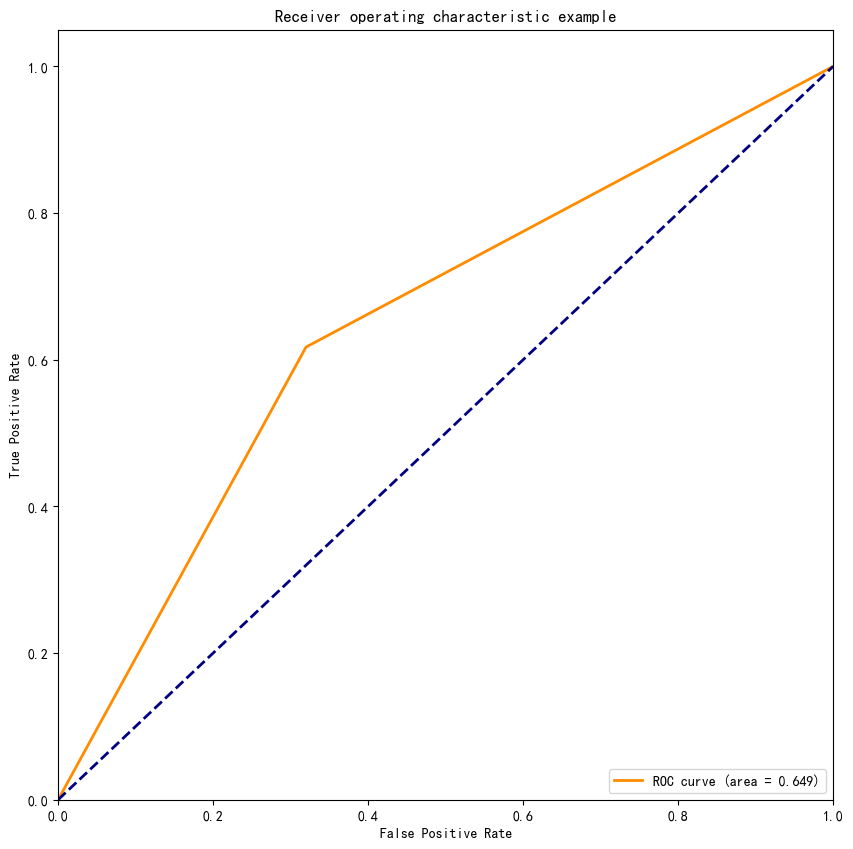

In [49]:
acu_curve(y_test,y_pred)

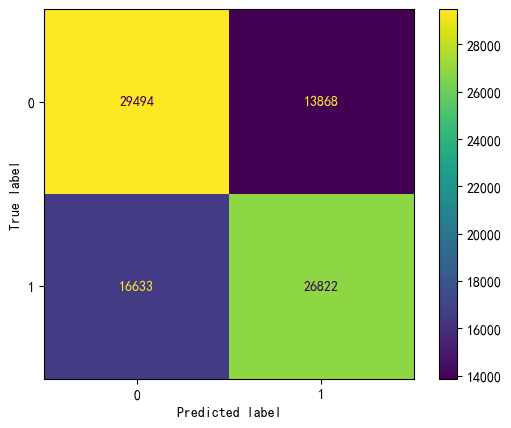

In [50]:
draw_cm(y_test,y_pred)

In [51]:
evaluate_model(rf,X_test,y_test)

准确率： 0.6486747987145375
精确率： 0.6591791594986484
召回率： 0.6172362213784375
F1分数： 0.6375185691366094


## Adaboost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred_ab=ab.predict(X_test)

In [54]:
evaluate_model(ab,X_test,y_test)

准确率： 0.6254880956494696
精确率： 0.6225223409258887
召回率： 0.6396272005522955
F1分数： 0.6309588667937892


<Figure size 640x480 with 0 Axes>

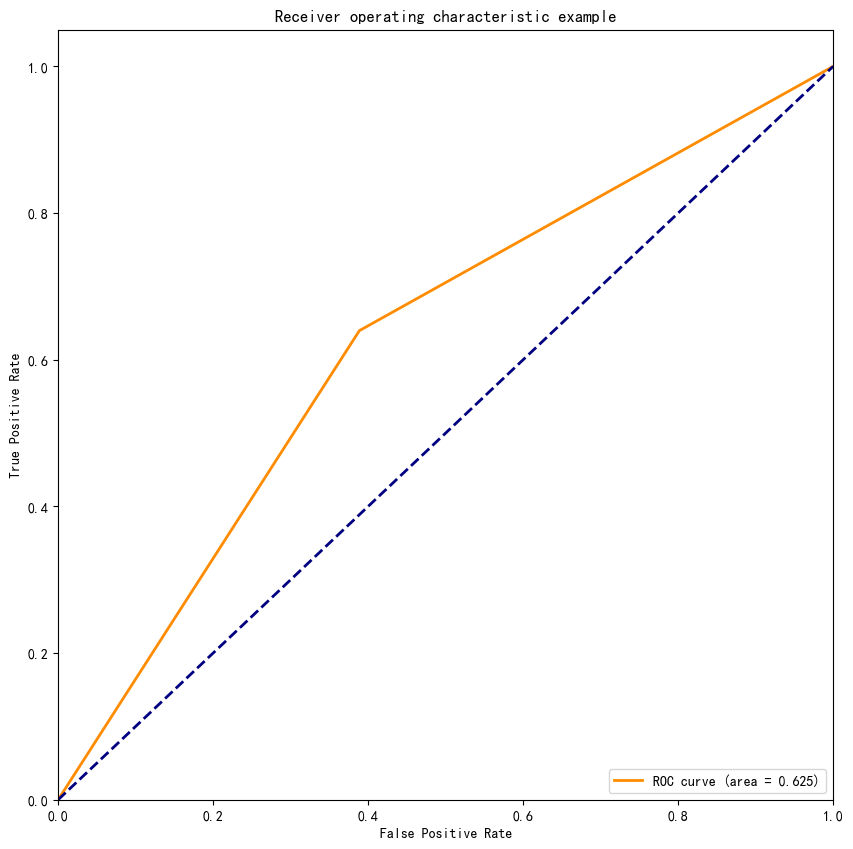

In [55]:
acu_curve(y_test,y_pred_ab)

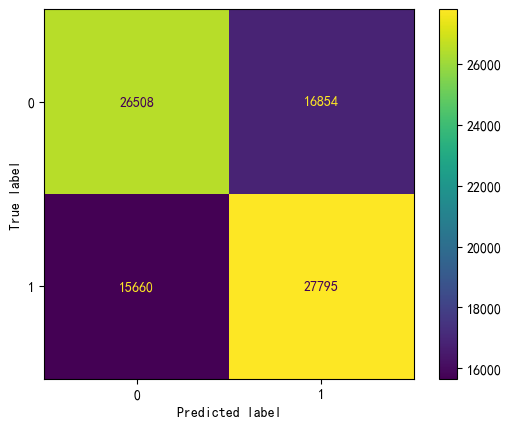

In [56]:
draw_cm(y_test,y_pred_ab)

## Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)

In [58]:
evaluate_model(gb,X_test,y_test)

准确率： 0.6370641694598984
精确率： 0.6359786914355963
召回率： 0.64287193648602
F1分数： 0.6394067360181275


<Figure size 640x480 with 0 Axes>

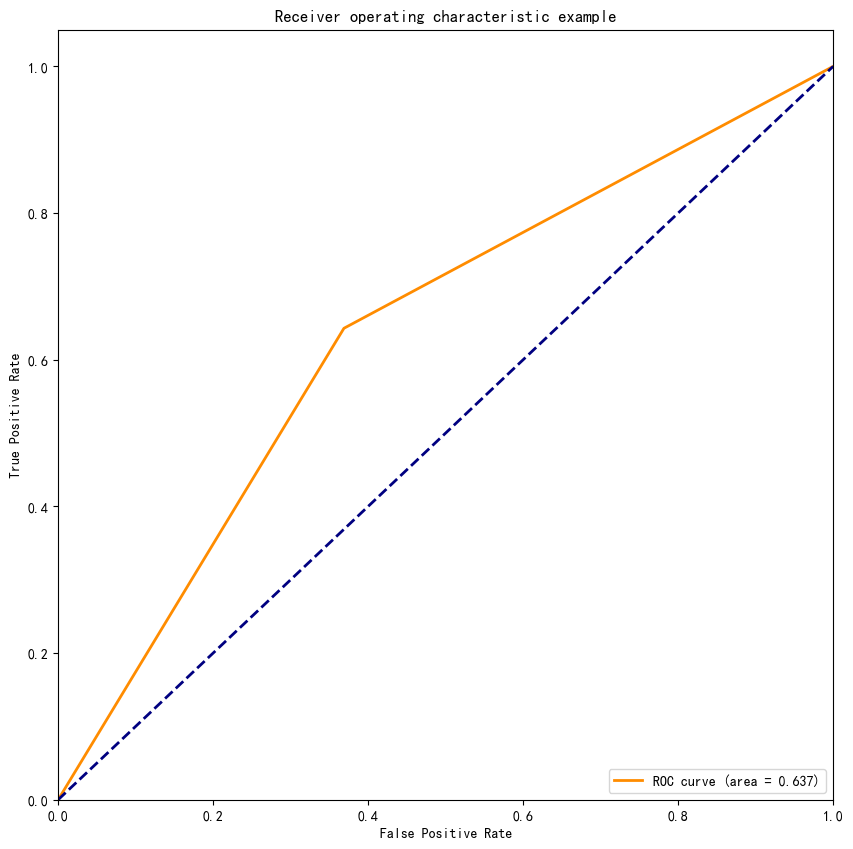

In [59]:
acu_curve(y_test,y_pred_gb)

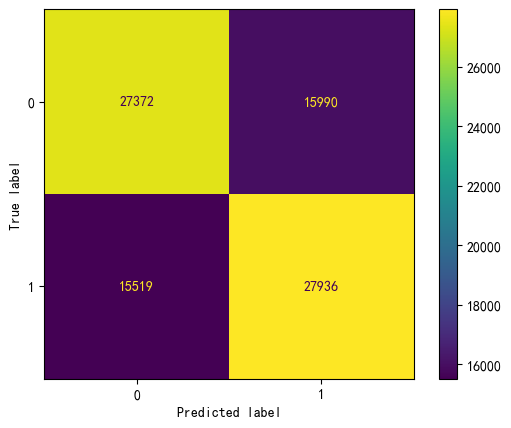

In [60]:
draw_cm(y_test,y_pred_gb)